In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

large K= underfitting, low K=overfitting

In [ ]:
#Question: use house size to predict house prices
# Output dataframes instead of arrays
set_config(transform_output="pandas")

sacramento = pd.read_csv("/Users/Ezynne/Documents/DSI/LCR/01_materials/notebooks/dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


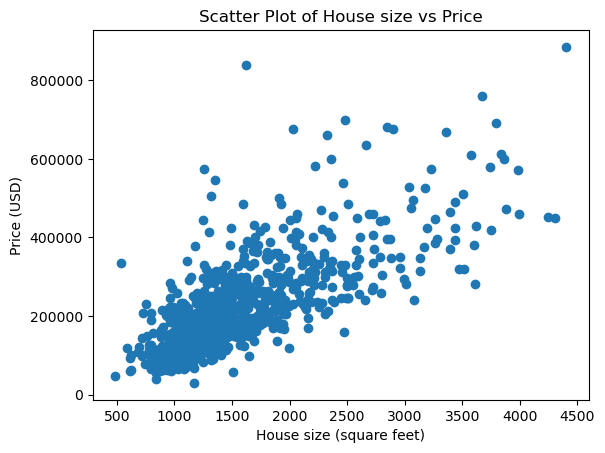

In [21]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [22]:
#set seed for reproducibility
np.random.seed(10)
small_sacramento = sacramento.sample(n=30) #taking 30 data points from your data set
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


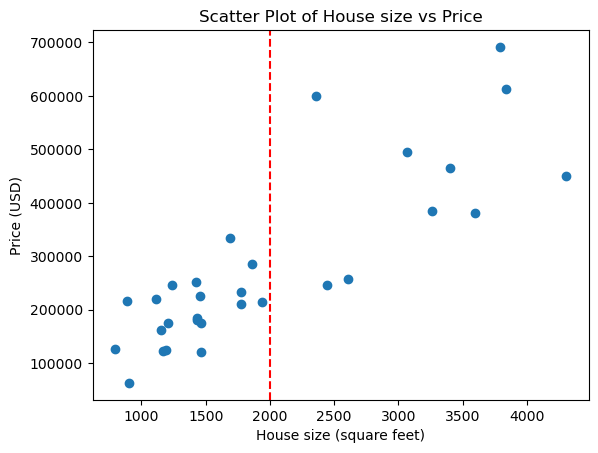

In [23]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [24]:
# Calculate the absolute difference between 2000 and the square footage of each house
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

# Find the 5 rows with the smallest distances (closest to 2000 square feet)
nearest_neighbors = small_sacramento.nsmallest(5, "dist")

# Display the 5 nearest neighbors
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


In [27]:
# finding the 5 rows with the smallest distance
nearest_neighbors = small_sacramento.nsmallest(5,'dist')
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


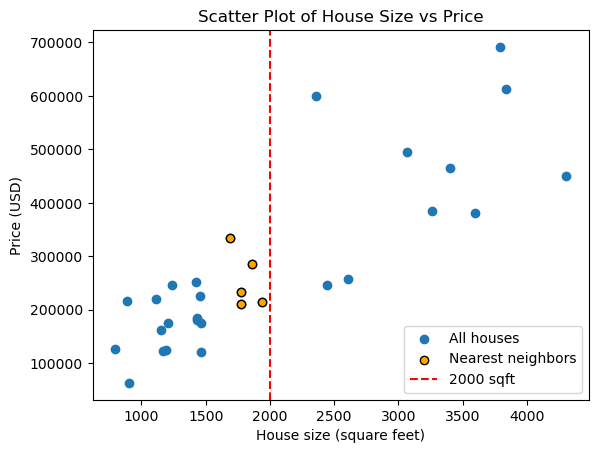

In [28]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [29]:
#making prediction
prediction = nearest_neighbors['price'].mean()
prediction

255630.0

Redoing analysis with all our entire data set

In [30]:
#split data into testing and training
sacramento_train, sacramento_test = train_test_split(sacramento, train_size=0.75,random_state=3)


In [33]:
#step 1, define x and y
#X_train = sacramento_train('sq__ft')

#Y_train = sacramento_train ('price')

X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [ ]:
knn_regression = KNeighborsRegressor()
#step 2 initialize model

In [35]:
#step 3 define oir parameter grid
param_grid = {
    'n_neighbors':range(1,201,3)
}

In [37]:
#step 4 initialize and fit grid search
sacr_gridsearch = GridSearchCV(
    estimator= knn_regression,
    param_grid= param_grid,
    cv = 5,
    scoring ='neg_root_mean_squared_error'# you can also use R2
)

In [38]:
sacr_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [40]:
#step 5 retrieve and format results
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007194,0.007022,0.004199,1.721866e-03,1,{'n_neighbors': 1},-113842.213563,-105453.882257,-95781.280408,-114804.680461,-97930.964518,-105562.604241,7847.240848,67
1,0.010794,0.006109,0.007596,3.137524e-03,4,{'n_neighbors': 4},-84751.696485,-88882.337189,-81759.488840,-88233.842688,-79882.878304,-84702.048701,3516.643495,46
2,0.003997,0.001549,0.002599,4.896873e-04,7,{'n_neighbors': 7},-79774.573724,-85005.655024,-79288.768952,-81248.386562,-77253.145043,-80514.105861,2584.391836,22
3,0.003022,0.000591,0.003397,1.355815e-03,10,{'n_neighbors': 10},-78909.655205,-83530.734802,-76127.674047,-83159.693918,-74663.589934,-79278.269581,3591.832746,8
4,0.003398,0.000800,0.003798,1.165697e-03,13,{'n_neighbors': 13},-79226.945820,-83897.144757,-76942.484442,-83298.787929,-75201.668320,-79713.406253,3424.297307,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.002799,0.000748,0.004598,7.989899e-04,187,{'n_neighbors': 187},-89906.460969,-80162.085026,-86989.243268,-95762.500254,-87386.037003,-88041.265304,5034.162897,62
63,0.002799,0.001165,0.005796,1.719077e-03,190,{'n_neighbors': 190},-90264.707669,-80389.227808,-87068.197178,-96070.710857,-87358.961849,-88230.361072,5083.364697,63
64,0.002599,0.000489,0.006197,7.481383e-04,193,{'n_neighbors': 193},-90534.429538,-80577.722316,-87256.487894,-96449.773777,-87506.927921,-88465.068289,5150.275793,64
65,0.003483,0.000968,0.004996,3.234067e-07,196,{'n_neighbors': 196},-90732.736931,-80738.725029,-87553.416704,-96552.361227,-87889.353982,-88693.318774,5121.426998,65


In [49]:
results['mean_test_score']= results['mean_test_score'].abs()

In [50]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007194,0.007022,0.004199,1.721866e-03,1,{'n_neighbors': 1},-113842.213563,-105453.882257,-95781.280408,-114804.680461,-97930.964518,105562.604241,7847.240848,67
1,0.010794,0.006109,0.007596,3.137524e-03,4,{'n_neighbors': 4},-84751.696485,-88882.337189,-81759.488840,-88233.842688,-79882.878304,84702.048701,3516.643495,46
2,0.003997,0.001549,0.002599,4.896873e-04,7,{'n_neighbors': 7},-79774.573724,-85005.655024,-79288.768952,-81248.386562,-77253.145043,80514.105861,2584.391836,22
3,0.003022,0.000591,0.003397,1.355815e-03,10,{'n_neighbors': 10},-78909.655205,-83530.734802,-76127.674047,-83159.693918,-74663.589934,79278.269581,3591.832746,8
4,0.003398,0.000800,0.003798,1.165697e-03,13,{'n_neighbors': 13},-79226.945820,-83897.144757,-76942.484442,-83298.787929,-75201.668320,79713.406253,3424.297307,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.002799,0.000748,0.004598,7.989899e-04,187,{'n_neighbors': 187},-89906.460969,-80162.085026,-86989.243268,-95762.500254,-87386.037003,88041.265304,5034.162897,62
63,0.002799,0.001165,0.005796,1.719077e-03,190,{'n_neighbors': 190},-90264.707669,-80389.227808,-87068.197178,-96070.710857,-87358.961849,88230.361072,5083.364697,63
64,0.002599,0.000489,0.006197,7.481383e-04,193,{'n_neighbors': 193},-90534.429538,-80577.722316,-87256.487894,-96449.773777,-87506.927921,88465.068289,5150.275793,64
65,0.003483,0.000968,0.004996,3.234067e-07,196,{'n_neighbors': 196},-90732.736931,-80738.725029,-87553.416704,-96552.361227,-87889.353982,88693.318774,5121.426998,65


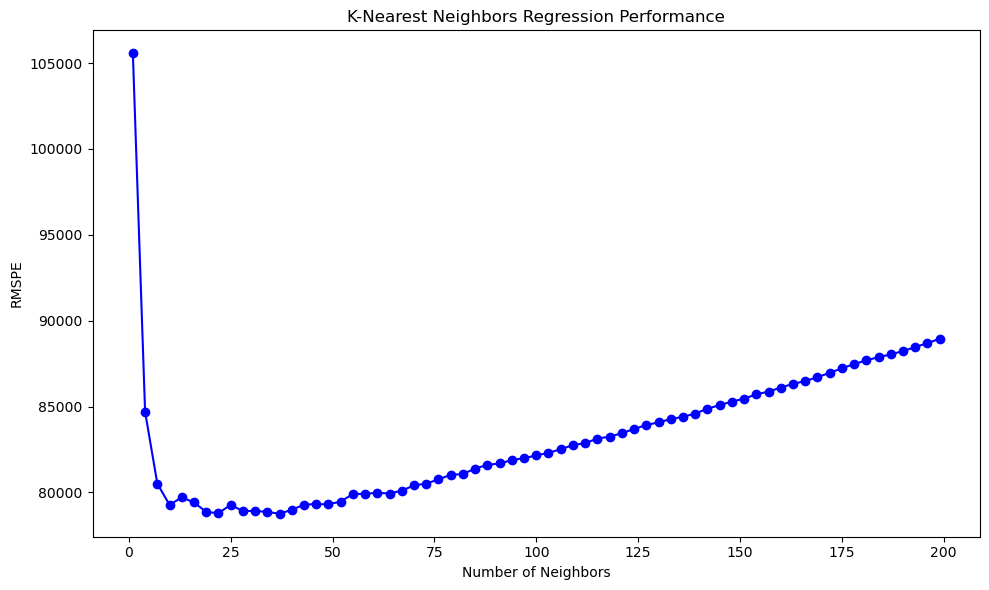

In [51]:

#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [52]:
sacr_gridsearch.best_params_

{'n_neighbors': 37}

In [53]:
sacramento_test['predicted'] = sacr_gridsearch.predict(sacramento_test[['sq__ft']])

In [54]:
rmspe = mean_squared_error(
y_true = sacramento_test['price'],
y_pred= sacramento_test['predicted']
)**0.5
rmspe

98533.77082105693

In [55]:
r2 = r2_score(
    y_true= sacramento_test['price'],
    y_pred= sacramento_test['predicted'])
r2


0.42170349911250504

c:\Users\Ezynne\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


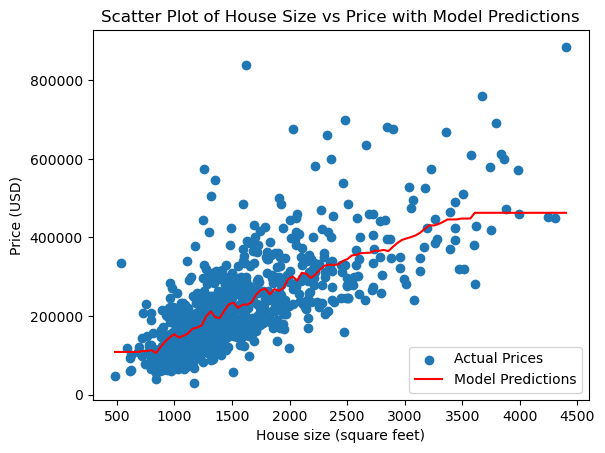

In [56]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")
# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show()

In [57]:
import math

In [76]:
#doing the background math
def rmspe(y_true, y_pred):
    n = len(y_true)
    squared_errors = []
    for i in range(n):
        error = y_true.iloc[i] - y_pred.iloc[i]
        squared_errors.append(error**2)
    mean_squared_error = sum(squared_errors)/n
    rmspe_value = math.sqrt(mean_squared_error)
    return rmspe_value

In [80]:
y_true= sacramento_test['price']
y_pred= sacramento_test['predicted']
rmspe (y_true,y_pred)

98533.77082105695